# Titel

# Importing the relevant libraries

In [101]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

## 1. Loading the raw data

In [102]:
# read data
data = pd.read_csv('Data.csv')

In [103]:
# Show the first 20 rows of the data
data.head(20)

,Index,Age,Gender,City,Position,Quit,YearsOverall,YearsGer,Seniority,MainTech,...,BasicSalary,SalaryBonus,LY_Salary,LY_Bonus,VacDays,EmplStatus,Contract,Language,CusSize,CusArea
0,250,28.0,Male,Munich,Network Administrator,No,9,3,Senior,Network,...,61200.0,7300,53300.0,6200,30,Full-time employee,Unlimited contract,English,1000+,Automotive
1,896,39.0,Female,Stuttgart,Project manager,No,13,13,Senior,NaN,...,108000.0,0,102000.0,0,30,Full-time employee,Unlimited contract,German,1000+,Automotive
2,260,35.0,Male,Frankfurt,Banker,No,12,2,Senior,NaN,...,100000.0,32000,NaN,NaN,NaN,Full-time employee,Unlimited contract,English,101 to 1000,Bank
3,661,32.0,Male,Amsterdam,Mobile Developer,No,13,NaN,Senior,Kotlin,...,85000.0,89000,80000.0,84000,27,Full-time employee,Unlimited contract,English,1000+,Bank
4,993,35.0,Female,Munich,Data Scientist,No,5,2,Senior,"SAS,SQL,Python",...,75000.0,10000,NaN,NaN,30,Full-time employee,Unlimited contract,English,1000+,Bank
5,1100,22.0,Male,Frankfurt,Software Engineer,Yes,2,2,Junior,Java,...,45000.0,7000,37000.0,3000,30,Full-time employee,Unlimited contract,German,1000+,Bank
6,334,31.0,Male,Moscow,Data Scientist,Yes,2.5,0,Lead,Python,...,20000.0,6500,17000.0,3500,30,Full-time employee,Unlimited contract,Russian,1000+,Bank
7,246,30.0,Female,Frankfurt,QA Engineer,No,6,4,Senior,Bash,...,70000.0,2000,70000.0,2000,30,Full-time employee,Unlimited contract,German,1000+,Bank
8,154,40.0,Female,Munich,Software Engineer,No,20,7,Middle,Java,...,54000.0,NaN,54000.0,NaN,30,Full-time employee,Unlimited contract,German,101 to 1000,BehÃ¶rde
9,1018,35.0,Male,Murnau am Staffelsee,Beikoch,No,1,1,Middle,Apotheker,...,30000.0,1000,NaN,NaN,20,Full-time employee,Temporary contract,German,up to 10,Biergarten


In [104]:
# Unrelevant columns löschen
# Lösche die Spalte Index
data = data.drop(['Index'], axis=1)

In [105]:
# Datatype and ohte information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1226 non-null   float64
 1   Gender        1243 non-null   object 
 2   City          1253 non-null   object 
 3   Position      1247 non-null   object 
 4   Quit          1234 non-null   object 
 5   YearsOverall  1237 non-null   object 
 6   YearsGer      1221 non-null   object 
 7   Seniority     1241 non-null   object 
 8   MainTech      1126 non-null   object 
 9   OtherTech     1096 non-null   object 
 10  BasicSalary   1252 non-null   float64
 11  SalaryBonus   828 non-null    object 
 12  LY_Salary     884 non-null    float64
 13  LY_Bonus      613 non-null    object 
 14  VacDays       1184 non-null   object 
 15  EmplStatus    1235 non-null   object 
 16  Contract      1223 non-null   object 
 17  Language      1236 non-null   object 
 18  CusSize       1234 non-null 

Datensatez hat sehr viele ungünsige Datentypen

In [106]:
# print all columns
print(data.columns)
# print count of columns
print(len(data.columns))


Index(['Age', 'Gender', 'City', 'Position ', 'Quit', 'YearsOverall',
       'YearsGer', 'Seniority', 'MainTech', 'OtherTech', 'BasicSalary',
       'SalaryBonus', 'LY_Salary', 'LY_Bonus', 'VacDays', 'EmplStatus',
       'Contract', 'Language', 'CusSize', 'CusArea'],
      dtype='object')
20


In [107]:
# Von MainTech die individuellen Ausprägungen anzeigen lassen
data['MainTech'].unique()

array(['Network', nan, 'Kotlin', 'SAS,SQL,Python', 'Java', 'Python',
       'Bash', 'Apotheker',
       'Linux/UNIX, GIT, Virtualisation Platforms, *shell(s) scripts',
       'Azure, SAP', 'TypeScript', 'C', 'Node.js', 'Swift', '.net',
       'Atlassian JIRA', 'SQL', 'Java, JavaScript',
       'Pegasystems platform ', 'iOS', 'PHP', 'Android', 'Java/Kotlin',
       'javascript', 'Javascript', 'Jira', 'Qml', 'C#/.NET', 'java',
       'AWS', 'Kubrrnetes', 'UML', 'Scala', 'JavaScript ', 'C++', 'C#',
       'Frontend', 'Network Automation', 'Python, SQL', 'Elixir',
       'PHP/MySQL', 'Embedded C++', 'JS', 'NodsJs', 'Linux',
       'Kuberenetes, Openstack', 'PL/SQL', 'SAP', '.NET', 'Spark',
       'Aws Hadoop Postgre Typescript', 'JavaScript', 'Java, JS', 'ABAP',
       'Javascript / Typescript', 'VB, RPA, Python', '.Net', 'R',
       'PowerShell', 'Test Management ',
       'Python, Whole Apache Data Science Stack, AWS', 'Python + SQL',
       'GCP', 'Typescript', 'Javascript ', 'Go', 'SAP

In [108]:
# describe the data
data.describe(include='all')

,Age,Gender,City,Position,Quit,YearsOverall,YearsGer,Seniority,MainTech,OtherTech,BasicSalary,SalaryBonus,LY_Salary,LY_Bonus,VacDays,EmplStatus,Contract,Language,CusSize,CusArea
count,1226.000000,1243,1253,1247,1234,1237,1221,1241,1126,1096,1.252000e+03,828,8.840000e+02,613,1184,1235,1223,1236,1234,1227
unique,NaN,3,112,148,2,48,53,24,251,562,NaN,167,NaN,130,45,11,3,14,5,63
top,NaN,Male,Berlin,Software Engineer,No,10,2,Senior,Python,Javascript / Typescript,NaN,0,NaN,0,30,Full-time employee,Unlimited contract,English,1000+,Product
freq,NaN,1049,681,387,1005,138,195,565,214,44,NaN,227,NaN,200,488,1189,1158,1020,448,759
mean,32.509788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.034313e+07,NaN,6.329228e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.663804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.826189e+09,NaN,1.681458e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000100e+04,NaN,1.100000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.895000e+04,NaN,5.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+04,NaN,6.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000e+04,NaN,7.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Gibt die unique values von Age aus
data['Age'].unique()

array([28., 39., 35., 32., 22., 31., 30., 40., 25., 41., 34., 36., 26.,
       38., 27., 24., 52., 33., 37., 29., 23., 44., 54., nan, 45., 46.,
       43., 49., 51., 47., 69., 50., 42., 48., 20., 56., 59., 66., 53.,
       65., 21.])

In [110]:
# streudiagramm für alle variablen
#ﬁﬁﬁ sns.pairplot(data)

numeric_features = clean_df.select_dtypes(include=[np.number])
numeric_features.dtypes

features =

# Großes Diagramm 
fig, axs = plt.subplots(4, 3, figsize=(30, 24))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(numeric_features[clean_df.booking_status == 1][feature],
                 bins=100,
                 color='green',
                 label='not canceled',
                 kde=True,
                 stat='density',
                 kde_kws=dict(cut=3),
                 alpha=0.4,
                 linewidth=0.25,
                 ax=axs[row, col])
    sns.histplot(numeric_features[clean_df.booking_status == 0][feature],
                 bins=100,
                 color='red',
                 label='canceled',
                 kde=True,
                 stat='density',
                 kde_kws=dict(cut=3),
                 alpha=0.4,
                 linewidth=0.25,
                 ax=axs[row, col])
    axs[row, col].set_title(f'Verteilung von {feature}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

# Show correlations in a heatmap between all variables
# Create correlation matrix
corr_matrix = data.corr().round(2)


# Create a heatmap
sns.heatmap(data=corr_matrix, annot=True)


In [111]:
# 

# 2. Data Preparation

## 2.1 Überprüfung fehlender Werte

In [112]:
# Kopie des Datensatzes erstellen für die weitere Bearbeitung
data_clean = data.copy()

In [113]:
# Überprüfung auf leere Werte
data_clean.isnull().sum()

Age              27
Gender           10
City              0
Position          6
Quit             19
YearsOverall     16
YearsGer         32
Seniority        12
MainTech        127
OtherTech       157
BasicSalary       1
SalaryBonus     425
LY_Salary       369
LY_Bonus        640
VacDays          69
EmplStatus       18
Contract         30
Language         17
CusSize          19
CusArea          26
dtype: int64

<Axes: >

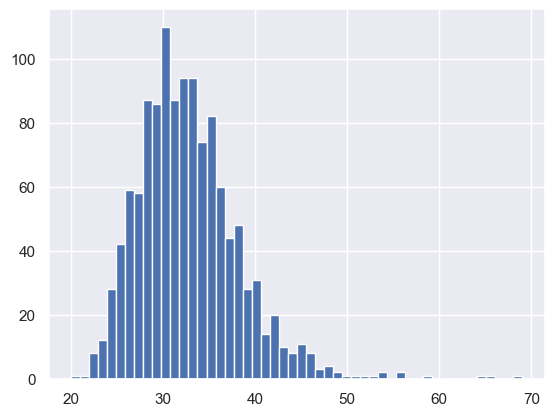

In [114]:
# Zeige die Alter in einem Histogramm
data_clean['Age'].hist(bins=50)

In [115]:
# zeige mir den Median für alter an
data_clean['Age'].median()

32.0

In [116]:
# Ersetze die leeren Werte mit dem Median
data_clean['Age'] = data_clean['Age'].fillna(data_clean['Age'].median())

In [117]:
# wandle Age in int um
data_clean['Age'] = data_clean['Age'].astype(int)

Male       1049
Female      192
Diverse       2
Name: Gender, dtype: int64


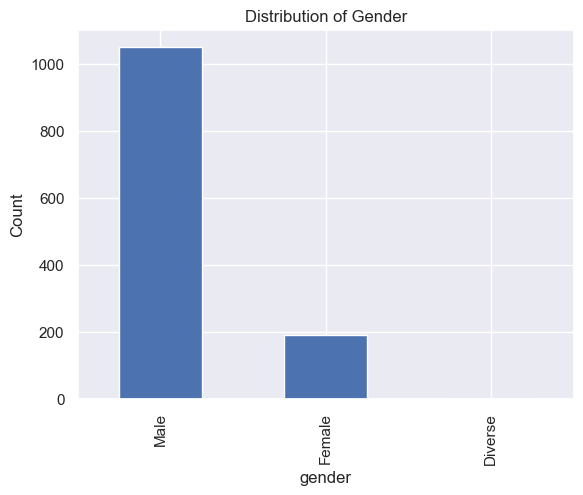

In [118]:
# Zeige ein Gender in einem barplot an
gender_counts = data_clean['Gender'].value_counts()
print(gender_counts)

gender_counts.plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


In [119]:
# Lösche in der Spalte Gender alle leeren Werte
data_clean = data_clean.dropna(subset=['Gender'])
# Lösche in der Spalte Gender alle Werte die Diverse enthalten
data_clean = data_clean[data_clean['Gender'] != 'Diverse']


Male      1049
Female     192
Name: Gender, dtype: int64


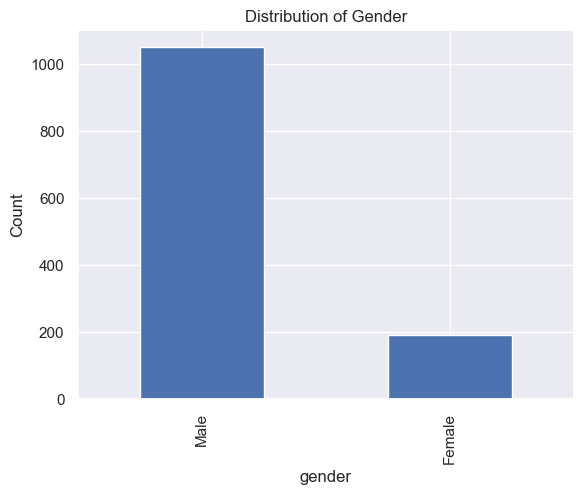

In [120]:
# Zeige ein Gender in einem barplot an
gender_counts = data_clean['Gender'].value_counts()
print(gender_counts)

gender_counts.plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


In [121]:
# Lösche die fehlenden Werte in der Position
data_clean = data_clean.dropna(subset=['Position '])
# Lösche die fhenlenden Werte in der Spalte Quit 
data_clean = data_clean.dropna(subset=['Quit'])

Postion hat am Ende ein leer Zeichen also umbennen

In [122]:
# Nenne die Spalte Poistion um in Position
data_clean = data_clean.rename(columns={'Position ': 'Position'})

In [123]:
# Zeige die unique values von YearsOverall 
data_clean['YearsOverall'].unique()

array(['9', '13', '12', '5', '2', '2.5', '6', '20', '1', '10', '8', '4',
       '3', '0.8', nan, '7', '11', '14', '15', '17', '31', '27', '25',
       '1,5', '18', '1.5', '23', '21', '30', '16', '0', '3.5', '383',
       '29', '15, thereof 8 as CTO', '19', '6.5', '7.5', '22', '28', '24',
       '2,5', '40', '26', '5.5', '1 (as QA Engineer) / 11 in total',
       '6 (not as a data scientist, but as a lab scientist)', '4.5',
       'less than year'], dtype=object)

In [124]:
# Ändere 1 (as QA Engineer) / 11 in total in 11 um
data_clean['YearsOverall'] = data_clean['YearsOverall'].replace('1 (as QA Engineer) / 11 in total', '11')
# Ändere 6 (not as a data scientist, but as a lab scientist in 6 um
data_clean['YearsOverall'] = data_clean['YearsOverall'].replace('6 (not as a data scientist, but as a lab scientist)', '6')
# Ändere less than year in 0
data_clean['YearsOverall'] = data_clean['YearsOverall'].replace('less than year', '0')
# Ändere 1,5 in 1.5 
data_clean['YearsOverall'] = data_clean['YearsOverall'].replace('1,5', '1.5')
# Ändere 15, thereof 8 as CTO in 15 um
data_clean['YearsOverall'] = data_clean['YearsOverall'].replace('15, thereof 8 as CTO', '15')
# Ändere 2,5 in 2.5
data_clean['YearsOverall'] = data_clean['YearsOverall'].replace('2,5', '2.5')



In [125]:
# Zeige die unique values von YearsOverall 
data_clean['YearsOverall'].unique()

array(['9', '13', '12', '5', '2', '2.5', '6', '20', '1', '10', '8', '4',
       '3', '0.8', nan, '7', '11', '14', '15', '17', '31', '27', '25',
       '1.5', '18', '23', '21', '30', '16', '0', '3.5', '383', '29', '19',
       '6.5', '7.5', '22', '28', '24', '40', '26', '5.5', '4.5'],
      dtype=object)

In [126]:
# Lösche die leeren Werte in der Spalte YearsOverall
data_clean = data_clean.dropna(subset=['YearsOverall'])
# Lösche 385 in der Spalte YearsOverall
data_clean = data_clean[data_clean['YearsOverall'] != 383]
# Wandel YearsOverall in float um
data_clean['YearsOverall'] = data_clean['YearsOverall'].astype(float)

<Axes: >

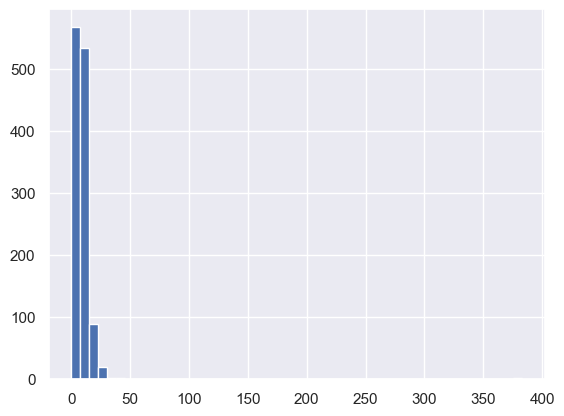

In [127]:
# Gib eine Grafik für YearsOverall aus
data_clean['YearsOverall'].hist(bins=50)

<Axes: >

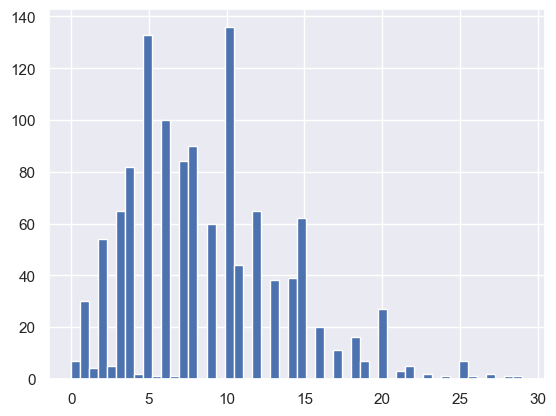

In [128]:
# Declare a variable that is equal to the 99th percentile of the 'Price' variable
q = data_clean['YearsOverall'].quantile(0.995)

# Create a new data file with the condition that all prices must be below the 99th percentile of 'Price'
# Remove the top 1% of the data about 'PreisTicket'
data_clean = data_clean[data_clean['YearsOverall'] < q]

data_clean['YearsOverall'].hist(bins=50)

In [129]:
# unique values von für YearsGer
data_clean['YearsGer'].unique()

array(['3', '13', '2', nan, '0', '4', '7', '1', '14', '0.5', '5',
       'â\x81°', '0.2', '10', '1.5', '4,5', '6', '0.25',
       '4 (in Switzerland), 0 (in Germany)', '3 (in Poland)', '20', '2.5',
       '15', '1,5', '8', '18', '12', '9', '3.5', '16', '19', '11', '0,3',
       '0.4', '0.8', '3,5', '0.9', '4 month', '2,5', '0,5', '4.5', '0.1',
       '2.6', '<1', '-', '25',
       '6 (not as a data scientist, but as a lab scientist)', '3 months',
       '1,7', 'less than year', '26', '< 1'], dtype=object)

In [130]:
# Lösche die Spalte YearsGer
data_clean = data_clean.drop(['YearsGer'], axis=1)

In [131]:
# Lösche die fehlenden Werte in der Spalte Seniority
data_clean = data_clean.dropna(subset=['Seniority'])


In [132]:
# zeige head von data_clean
data_clean.head()

,Age,Gender,City,Position,Quit,YearsOverall,Seniority,MainTech,OtherTech,BasicSalary,SalaryBonus,LY_Salary,LY_Bonus,VacDays,EmplStatus,Contract,Language,CusSize,CusArea
0,28,Male,Munich,Network Administrator,No,9.0,Senior,Network,NaN,61200.0,7300,53300.0,6200,30,Full-time employee,Unlimited contract,English,1000+,Automotive
1,39,Female,Stuttgart,Project manager,No,13.0,Senior,NaN,NaN,108000.0,0,102000.0,0,30,Full-time employee,Unlimited contract,German,1000+,Automotive
2,35,Male,Frankfurt,Banker,No,12.0,Senior,NaN,NaN,100000.0,32000,NaN,NaN,NaN,Full-time employee,Unlimited contract,English,101 to 1000,Bank
3,32,Male,Amsterdam,Mobile Developer,No,13.0,Senior,Kotlin,Kotlin,85000.0,89000,80000.0,84000,27,Full-time employee,Unlimited contract,English,1000+,Bank
4,35,Female,Munich,Data Scientist,No,5.0,Senior,"SAS,SQL,Python","Python, SQL, SAS",75000.0,10000,NaN,NaN,30,Full-time employee,Unlimited contract,English,1000+,Bank


In [133]:
# Überprüfung auf leere Werte
data_clean.isnull().sum()

Age               0
Gender            0
City              0
Position          0
Quit              0
YearsOverall      0
Seniority         0
MainTech        112
OtherTech       141
BasicSalary       0
SalaryBonus     392
LY_Salary       338
LY_Bonus        603
VacDays          49
EmplStatus        7
Contract         16
Language          5
CusSize           4
CusArea          10
dtype: int64

In [134]:
# Ergänze den Datensatz um eine weitere Spalte  TechRole hinzu
data_clean['TechRole'] = 0

In [135]:
# Wenn in MainTech ein Wert enthalten ist, dann schreibe in TechRole 1
data_clean.loc[data_clean['MainTech'].notnull(), 'TechRole'] = 1

In [136]:
# Zeige head von data_clean
data_clean.head()

,Age,Gender,City,Position,Quit,YearsOverall,Seniority,MainTech,OtherTech,BasicSalary,SalaryBonus,LY_Salary,LY_Bonus,VacDays,EmplStatus,Contract,Language,CusSize,CusArea,TechRole
0,28,Male,Munich,Network Administrator,No,9.0,Senior,Network,NaN,61200.0,7300,53300.0,6200,30,Full-time employee,Unlimited contract,English,1000+,Automotive,1
1,39,Female,Stuttgart,Project manager,No,13.0,Senior,NaN,NaN,108000.0,0,102000.0,0,30,Full-time employee,Unlimited contract,German,1000+,Automotive,0
2,35,Male,Frankfurt,Banker,No,12.0,Senior,NaN,NaN,100000.0,32000,NaN,NaN,NaN,Full-time employee,Unlimited contract,English,101 to 1000,Bank,0
3,32,Male,Amsterdam,Mobile Developer,No,13.0,Senior,Kotlin,Kotlin,85000.0,89000,80000.0,84000,27,Full-time employee,Unlimited contract,English,1000+,Bank,1
4,35,Female,Munich,Data Scientist,No,5.0,Senior,"SAS,SQL,Python","Python, SQL, SAS",75000.0,10000,NaN,NaN,30,Full-time employee,Unlimited contract,English,1000+,Bank,1


<Axes: >

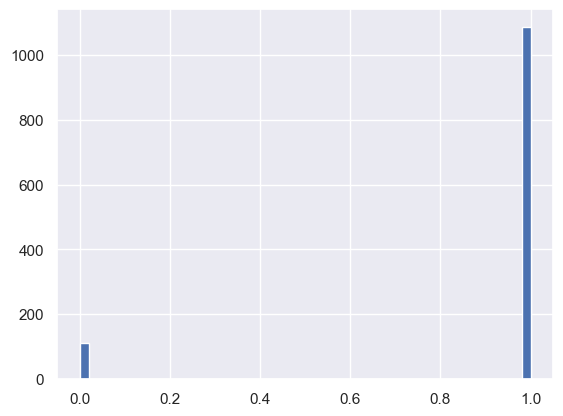

In [137]:
# Zeige die Distribution von TechRole
data_clean['TechRole'].hist(bins=50)

In [138]:
# Lösche die Spalte MainTech
data_clean = data_clean.drop(['MainTech'], axis=1)
# Lösche die Spalte OtherTech
data_clean = data_clean.drop(['OtherTech'], axis=1)


In [139]:
# Überprüfung auf leere Werte
data_clean.isnull().sum()

Age               0
Gender            0
City              0
Position          0
Quit              0
YearsOverall      0
Seniority         0
BasicSalary       0
SalaryBonus     392
LY_Salary       338
LY_Bonus        603
VacDays          49
EmplStatus        7
Contract         16
Language          5
CusSize           4
CusArea          10
TechRole          0
dtype: int64

In [140]:
# Ersteze die fehlenden Werte bei SalaryBonus durch 0
data_clean['SalaryBonus'] = data_clean['SalaryBonus'].fillna(0)

In [141]:
# Zeig die unique values von SalaryBonus
data_clean['SalaryBonus'].unique()

array(['7300', '0', '32000', '89000', '10000', '7000', '6500', '2000', 0,
       '1000', '26000', '20700', '40000', '17800', '200000', '80000',
       '30000', '12000', '67000', '7750', '6000', '62000', '18000',
       '60000', '101', '20000', '45600', '5000', '15000', '70000', '8000',
       '1100', '3000', '4400', '66500', '17000', '15900', '65000',
       '63000', '1250', '4700', '4500', '96000', '25000', 'depends',
       '1500', '55000', '88000', '170000', '1600', '13000', '112000',
       '60847.32', '4000', '28800', '50000', '2500', '3520', '3600',
       '7200', '120000', '9400', '72000', '75000', '5800', '56000',
       '6300', '22000', '7500', '10300', '6900', '95000', '140000',
       '22500', '77000', '12150', '3500', '500', '63500', '20240',
       '81200', '11000', '46000', '400', '122.13', '5400', '14500',
       '43500', '50400', '77400', '12', '74000', '150000', '13500',
       '5500', '45000', '38500', '2400', '1150000', '9000', '4300',
       '59000', '100000', '7050

In [142]:
# Erseteze den Wert 15000+- durch  15000
data_clean['SalaryBonus'] = data_clean['SalaryBonus'].replace('15000+-', '15000')
# Ersetze den Wert `-' durch 0
data_clean['SalaryBonus'] = data_clean['SalaryBonus'].replace('-', '0')
# Lösche den Wert Not sure
data_clean = data_clean[data_clean['SalaryBonus'] != 'Not sure']
# Lösche den Wert bvg only
data_clean = data_clean[data_clean['SalaryBonus'] != 'bvg only']
# Ersetze den Wert Na durch 0
data_clean['SalaryBonus'] = data_clean['SalaryBonus'].replace('Na', '0')
# Lösche den Wert depends
data_clean = data_clean[data_clean['SalaryBonus'] != 'depends']
# Entferne die Nachkomma Stellen von 60847.32
data_clean['SalaryBonus'] = data_clean['SalaryBonus'].replace('60847.32', '60847')
# Entferne die Nachkomma Stellen von 122.13
data_clean['SalaryBonus'] = data_clean['SalaryBonus'].replace('122.13', '122')


In [143]:
# Wandle die Spalte SalaryBonus in int um
data_clean['SalaryBonus'] = data_clean['SalaryBonus'].astype(int)

In [144]:
# Zeige die unique values von SalaryBonus
data_clean['SalaryBonus'].unique()

array([      7300,          0,      32000,      89000,      10000,
             7000,       6500,       2000,       1000,      26000,
            20700,      40000,      17800,     200000,      80000,
            30000,      12000,      67000,       7750,       6000,
            62000,      18000,      60000,        101,      20000,
            45600,       5000,      15000,      70000,       8000,
             1100,       3000,       4400,      66500,      17000,
            15900,      65000,      63000,       1250,       4700,
             4500,      96000,      25000,       1500,      55000,
            88000,     170000,       1600,      13000,     112000,
            60847,       4000,      28800,      50000,       2500,
             3520,       3600,       7200,     120000,       9400,
            72000,      75000,       5800,      56000,       6300,
            22000,       7500,      10300,       6900,      95000,
           140000,      22500,      77000,      12150,       3

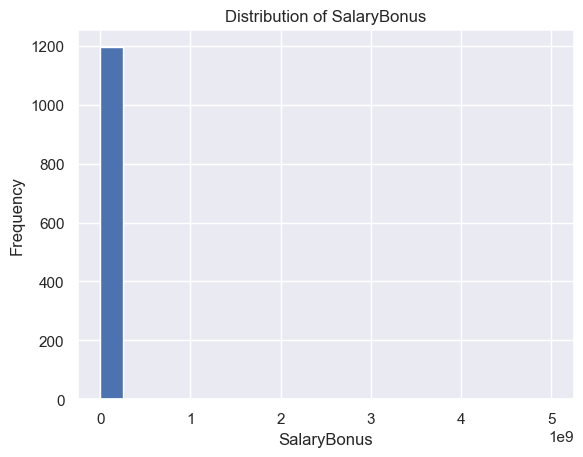

In [145]:
# Zeige mir die Vertelung von SalaryBonus
plt.hist(data_clean['SalaryBonus'], bins=20)
plt.xlabel('SalaryBonus')
plt.ylabel('Frequency')
plt.title('Distribution of SalaryBonus')
plt.show()

In [146]:
# Zeige fehlende Werte an
data_clean.isnull().sum()

Age               0
Gender            0
City              0
Position          0
Quit              0
YearsOverall      0
Seniority         0
BasicSalary       0
SalaryBonus       0
LY_Salary       336
LY_Bonus        601
VacDays          49
EmplStatus        7
Contract         16
Language          5
CusSize           4
CusArea          10
TechRole          0
dtype: int64

In [147]:
# Zeige die unique values von von LY_Bonus
data_clean['LY_Bonus'].unique()

array(['6200', '0', nan, '84000', '3000', '3500', '2000', '17000',
       '30000', '80000', '15000', '58000', '1500', '5400', '49000',
       '52000', '7000', '10000', '67200', '800', '67000', '8000', '65000',
       '3900', '70000', '8500', '41000', '62000', '11000', '60000',
       '5000', '20000', '1100', '500', '35000', '85000', '55000', '82000',
       '1000', '700', '34000', '37500', '6000', '53000', '300', '47000',
       '78000', '600', '13000', '4800', '28800', '2500', '2760', '2600',
       '100000', '75000', '4000', '54000', '63000', '122000', '101',
       '33000', '6800', '61000', '25000', '77000', '6300', '200000',
       '850', '18000', '1800', '57000', '46000', '7500', '18800', '50000',
       '56000', '45000', '74800', '40000', '115000', '92000', '120000',
       '64000', '5500', '12000', '98000', '31000', '59000', '300000',
       '87000', '9000', '22000', '76000', '6900', '66000', '8100',
       '86000', '72000', '90000', '55200', '9500', '28500', '12500', '-',
     

In [148]:
# Erste die die fehlenden Werte und -, durch 0
data_clean['LY_Bonus'] = data_clean['LY_Bonus'].fillna('0')
data_clean['LY_Bonus'] = data_clean['LY_Bonus'].replace('-', '0')

In [149]:
# Zeige die unique values von von LY_Bonus
data_clean['LY_Bonus'].unique()

array(['6200', '0', '84000', '3000', '3500', '2000', '17000', '30000',
       '80000', '15000', '58000', '1500', '5400', '49000', '52000',
       '7000', '10000', '67200', '800', '67000', '8000', '65000', '3900',
       '70000', '8500', '41000', '62000', '11000', '60000', '5000',
       '20000', '1100', '500', '35000', '85000', '55000', '82000', '1000',
       '700', '34000', '37500', '6000', '53000', '300', '47000', '78000',
       '600', '13000', '4800', '28800', '2500', '2760', '2600', '100000',
       '75000', '4000', '54000', '63000', '122000', '101', '33000',
       '6800', '61000', '25000', '77000', '6300', '200000', '850',
       '18000', '1800', '57000', '46000', '7500', '18800', '50000',
       '56000', '45000', '74800', '40000', '115000', '92000', '120000',
       '64000', '5500', '12000', '98000', '31000', '59000', '300000',
       '87000', '9000', '22000', '76000', '6900', '66000', '8100',
       '86000', '72000', '90000', '55200', '9500', '28500', '12500',
       '94000',

In [150]:
# Wandle LY_Bonus in int um
data_clean['LY_Bonus'] = data_clean['LY_Bonus'].astype(int)

In [151]:
# unique values von LY_Bonus
data_clean['LY_Bonus'].unique()

array([    6200,        0,    84000,     3000,     3500,     2000,
          17000,    30000,    80000,    15000,    58000,     1500,
           5400,    49000,    52000,     7000,    10000,    67200,
            800,    67000,     8000,    65000,     3900,    70000,
           8500,    41000,    62000,    11000,    60000,     5000,
          20000,     1100,      500,    35000,    85000,    55000,
          82000,     1000,      700,    34000,    37500,     6000,
          53000,      300,    47000,    78000,      600,    13000,
           4800,    28800,     2500,     2760,     2600,   100000,
          75000,     4000,    54000,    63000,   122000,      101,
          33000,     6800,    61000,    25000,    77000,     6300,
         200000,      850,    18000,     1800,    57000,    46000,
           7500,    18800,    50000,    56000,    45000,    74800,
          40000,   115000,    92000,   120000,    64000,     5500,
          12000,    98000,    31000,    59000,   300000,    87

(array([1.195e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000., 22500000., 25000000., 27500000.,
        30000000., 32500000., 35000000., 37500000., 40000000., 42500000.,
        45000000., 47500000., 50000000.]),
 <BarContainer object of 20 artists>)

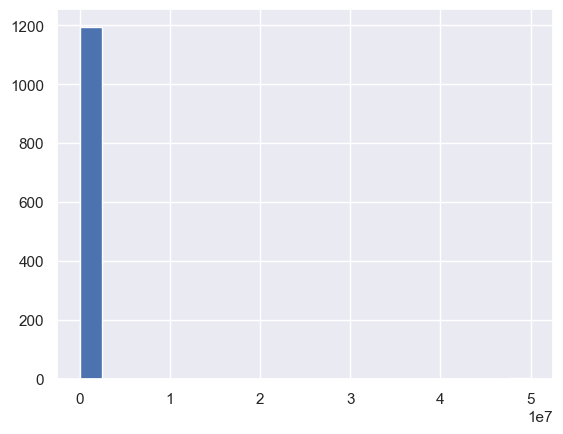

In [152]:
# Zeoge die Vertelung von LY_Bonus
plt.hist(data_clean['LY_Bonus'], bins=20)

In [153]:
# Erstelle eine neue Spalte ThisYearBonus und fülle sie mit 0
data_clean['ThisYearBonus'] = 0
# Wenn LY_Bonus grösser als 0 ist, dann schreibe in ThisYearBonus 1
data_clean.loc[data_clean['SalaryBonus'] > 0, 'ThisYearBonus'] = 1

In [154]:
# Erstelle eine neue Spalte LastYearBonus und fülle sie mit 0
data_clean['LastYearBonus'] = 0
# Wenn LY_Bonus grösser als 0 ist, dann schreibe in LastYearBonus 1
data_clean.loc[data_clean['LY_Bonus'] > 0, 'LastYearBonus'] = 1

In [155]:
# Entferne die Spalte LY_Bonus
data_clean = data_clean.drop(['LY_Bonus'], axis=1)
# Entferne die Spalte SalaryBonus
data_clean = data_clean.drop(['SalaryBonus'], axis=1)

<Axes: xlabel='ThisYearBonus', ylabel='count'>

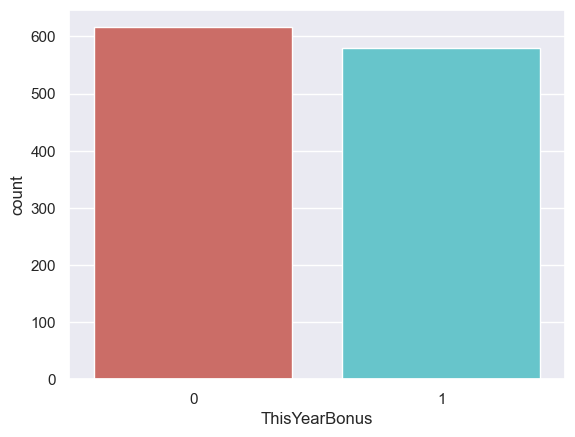

In [156]:
# Zeige coutnplot von ThisYearBonus
sns.countplot(x='ThisYearBonus', data=data_clean, palette='hls')

<Axes: xlabel='LastYearBonus', ylabel='count'>

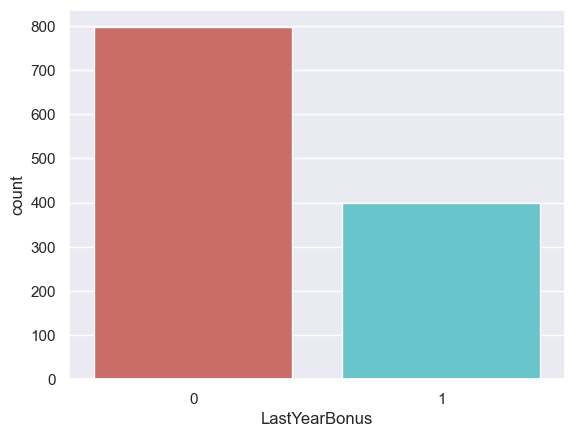

In [157]:
# zeige countplot von LastYearBonus
sns.countplot(x='LastYearBonus', data=data_clean, palette='hls')

In [158]:
# zeige mir die fehlenden Werte an
data_clean.isnull().sum()

Age                0
Gender             0
City               0
Position           0
Quit               0
YearsOverall       0
Seniority          0
BasicSalary        0
LY_Salary        336
VacDays           49
EmplStatus         7
Contract          16
Language           5
CusSize            4
CusArea           10
TechRole           0
ThisYearBonus      0
LastYearBonus      0
dtype: int64

In [159]:
# Zeige die unique values von von LY_Salary
data_clean['LY_Salary'].unique()

array([5.3300e+04, 1.0200e+05,        nan, 8.0000e+04, 3.7000e+04,
       1.7000e+04, 7.0000e+04, 5.4000e+04, 5.6400e+04, 9.0000e+04,
       7.5000e+04, 8.5000e+04, 5.2000e+04, 6.7000e+04, 5.7000e+04,
       1.3200e+05, 4.7000e+04, 1.0800e+05, 2.0000e+04, 1.2500e+05,
       6.0000e+04, 4.5000e+04, 5.8000e+04, 6.1200e+04, 4.2000e+04,
       5.3000e+04, 7.2500e+04, 4.3000e+04, 4.6000e+04, 5.0000e+04,
       4.7500e+04, 1.0000e+05, 6.2000e+04, 7.8000e+04, 6.2500e+04,
       6.8000e+04, 1.6000e+04, 1.6000e+05, 1.9000e+05, 5.2500e+04,
       6.5000e+04, 6.6000e+04, 5.5000e+04, 5.4500e+04, 6.1500e+04,
       7.6000e+04, 6.3000e+04, 5.0400e+04, 5.8040e+04, 3.4000e+04,
       7.0200e+04, 2.5300e+04, 3.5000e+04, 4.0000e+04, 3.0000e+04,
       1.3000e+05, 7.4000e+04, 7.2000e+04, 2.0000e+05, 8.2000e+04,
       2.8800e+04, 4.4000e+04, 1.2000e+05, 8.8000e+04, 1.6560e+04,
       2.6000e+04, 3.6000e+04, 4.1000e+04, 1.2000e+04, 5.6000e+04,
       9.2000e+04, 8.1000e+04, 6.2400e+04, 7.3000e+04, 6.1000e

In [160]:
# Ersetze die fehlenden Werte durch 0
data_clean['LY_Salary'] = data_clean['LY_Salary'].fillna(0)

(array([1.195e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.00e+00, 2.50e+07, 5.00e+07, 7.50e+07, 1.00e+08, 1.25e+08,
        1.50e+08, 1.75e+08, 2.00e+08, 2.25e+08, 2.50e+08, 2.75e+08,
        3.00e+08, 3.25e+08, 3.50e+08, 3.75e+08, 4.00e+08, 4.25e+08,
        4.50e+08, 4.75e+08, 5.00e+08]),
 <BarContainer object of 20 artists>)

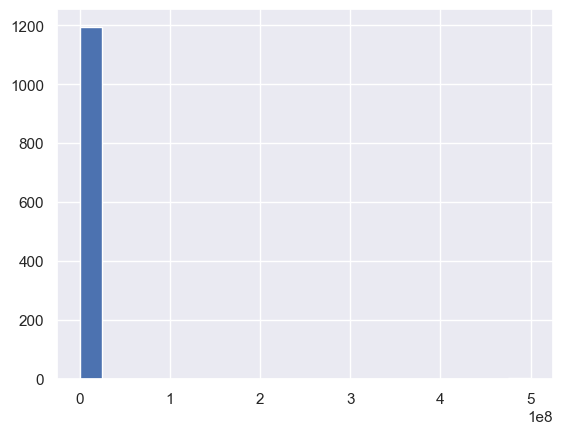

In [161]:
# Zeige die Verteilung von LY_Salary
plt.hist(data_clean['LY_Salary'], bins=20)

In [162]:
# Declare a variable that is equal to the 99th percentile of the 'Price' variable
q = data_clean['LY_Salary'].quantile(0.99)

# Create a new data file with the condition that all prices must be below the 99th percentile of 'Price'
# Remove the top 1% of the data about 'PreisTicket'
data_cut = data_clean[data_clean['LY_Salary'] < q]

data_cut.describe(include='all')

,Age,Gender,City,Position,Quit,YearsOverall,Seniority,BasicSalary,LY_Salary,VacDays,EmplStatus,Contract,Language,CusSize,CusArea,TechRole,ThisYearBonus,LastYearBonus
count,1184.000000,1184,1184,1184,1184,1184.000000,1184,1184.000000,1184.000000,1135,1177,1169,1179,1180,1174,1184.000000,1184.000000,1184.000000
unique,NaN,2,105,144,2,NaN,22,NaN,NaN,43,10,3,13,5,61,NaN,NaN,NaN
top,NaN,Male,Berlin,Software Engineer,No,NaN,Senior,NaN,NaN,30,Full-time employee,Unlimited contract,English,1000+,Product,NaN,NaN,NaN
freq,NaN,1000,649,366,964,NaN,540,NaN,NaN,473,1140,1110,977,428,733,NaN,NaN,NaN
mean,32.328547,NaN,NaN,NaN,NaN,8.609459,NaN,70705.651292,46666.213682,NaN,NaN,NaN,NaN,NaN,NaN,0.906250,0.483108,0.330236
std,5.214519,NaN,NaN,NaN,NaN,4.966149,NaN,31736.975963,32955.262067,NaN,NaN,NaN,NaN,NaN,NaN,0.291604,0.499926,0.470497
min,20.000000,NaN,NaN,NaN,NaN,0.000000,NaN,10001.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,29.000000,NaN,NaN,NaN,NaN,5.000000,NaN,58000.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
50%,32.000000,NaN,NaN,NaN,NaN,8.000000,NaN,70000.000000,58000.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,35.000000,NaN,NaN,NaN,NaN,12.000000,NaN,80000.000000,70550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000


(array([1.195e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.00e+00, 2.50e+07, 5.00e+07, 7.50e+07, 1.00e+08, 1.25e+08,
        1.50e+08, 1.75e+08, 2.00e+08, 2.25e+08, 2.50e+08, 2.75e+08,
        3.00e+08, 3.25e+08, 3.50e+08, 3.75e+08, 4.00e+08, 4.25e+08,
        4.50e+08, 4.75e+08, 5.00e+08]),
 <BarContainer object of 20 artists>)

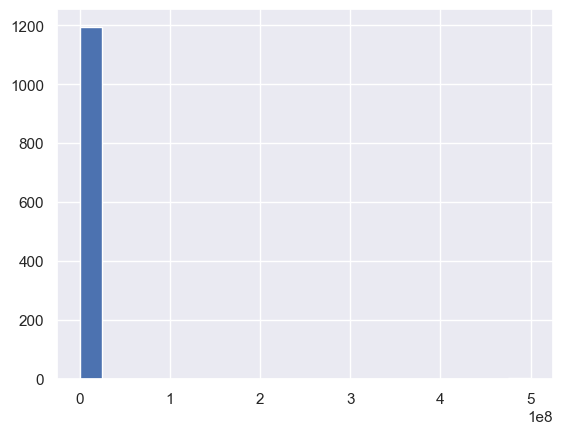

In [163]:
plt.hist(data_clean['LY_Salary'], bins=20)

In [164]:
# Lösche die Spaalte LY_Salary
data_clean = data_clean.drop(['LY_Salary'], axis=1)

In [165]:
# Zeige die fehlenden Werte an
data_clean.isnull().sum()

Age               0
Gender            0
City              0
Position          0
Quit              0
YearsOverall      0
Seniority         0
BasicSalary       0
VacDays          49
EmplStatus        7
Contract         16
Language          5
CusSize           4
CusArea          10
TechRole          0
ThisYearBonus     0
LastYearBonus     0
dtype: int64

In [166]:
# Entferne alle restlichen fehlenden Werte
data_clean = data_clean.dropna()

In [167]:
# Lösche Spalte City
data_clean = data_clean.drop(['City'], axis=1)

In [168]:
# Lösche die Spalte VacDays
data_clean = data_clean.drop(['VacDays'], axis=1)

In [169]:
# Lösche die Spalte Position
data_clean = data_clean.drop(['Position'], axis=1)

In [170]:
# zeige head von data_clean
data_clean.head()

,Age,Gender,Quit,YearsOverall,Seniority,BasicSalary,EmplStatus,Contract,Language,CusSize,CusArea,TechRole,ThisYearBonus,LastYearBonus
0,28,Male,No,9.0,Senior,61200.0,Full-time employee,Unlimited contract,English,1000+,Automotive,1,1,1
1,39,Female,No,13.0,Senior,108000.0,Full-time employee,Unlimited contract,German,1000+,Automotive,0,0,0
3,32,Male,No,13.0,Senior,85000.0,Full-time employee,Unlimited contract,English,1000+,Bank,1,1,1
4,35,Female,No,5.0,Senior,75000.0,Full-time employee,Unlimited contract,English,1000+,Bank,1,1,0
5,22,Male,Yes,2.0,Junior,45000.0,Full-time employee,Unlimited contract,German,1000+,Bank,1,1,1


In [171]:
# unique values von CusSize
data_clean['CusSize'].unique()

array(['1000+', '101 to 1000', 'up to 10', '51 to 100', '11 to 50'],
      dtype=object)

In [172]:
# unique values von Language
data_clean['Language'].unique()

array(['English', 'German', 'Russian', 'Deuglisch', 'French', 'Italian',
       'Polish', 'Spanish', 'Czech', 'Indian', 'English and German',
       'Russian, English', 'both'], dtype=object)

In [173]:
# Lösche die Spalte Language
data_clean = data_clean.drop(['Language'], axis=1)

In [174]:
# unique values von Contract
data_clean['Contract'].unique()

array(['Unlimited contract', 'Temporary contract', '0'], dtype=object)

<Axes: xlabel='Contract', ylabel='count'>

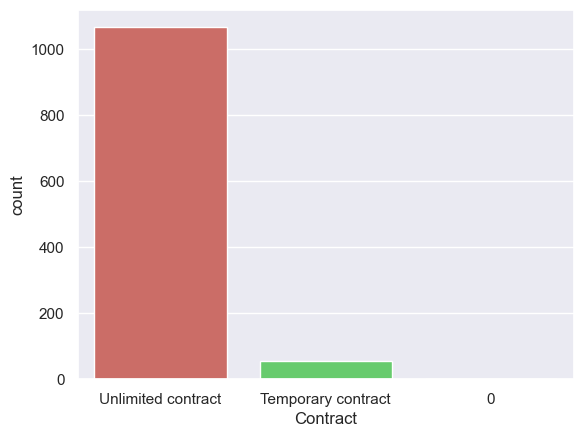

In [175]:
# zeige die Verteilung von Contract
sns.countplot(x='Contract', data=data_clean, palette='hls')

In [176]:
# lösche die 0 Werte von Contract
data_clean = data_clean[data_clean['Contract'] != 0]

<Axes: xlabel='EmplStatus', ylabel='count'>

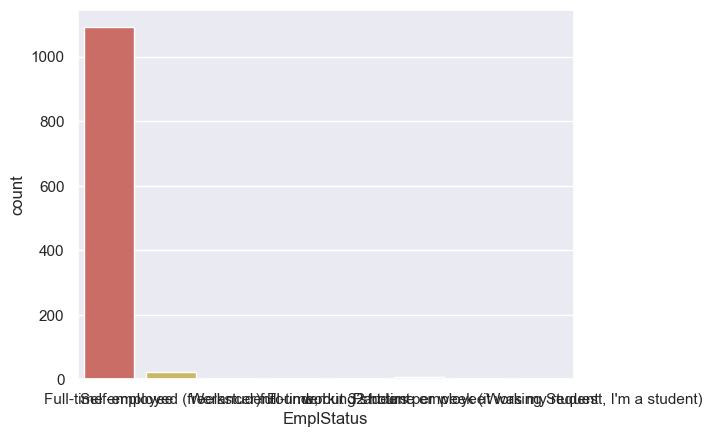

In [177]:
# zeige die Verteilung von EmplStaturs
sns.countplot(x='EmplStatus', data=data_clean, palette='hls')

In [178]:
# uniuqe values von EmplStatus
data_clean['EmplStatus'].unique()

array(['Full-time employee', 'Self-employed (freelancer)', 'Werkstudent',
       'Founder', 'working student', 'Part-time employee',
       "full-time, but 32 hours per week (it was my request, I'm a student)",
       'Working Student'], dtype=object)

In [179]:
# Lösche die Spalte EmplStatus
data_clean = data_clean.drop(['EmplStatus'], axis=1)

In [180]:
# Zeige den aktuellen Dataframe
data_clean.head()

,Age,Gender,Quit,YearsOverall,Seniority,BasicSalary,Contract,CusSize,CusArea,TechRole,ThisYearBonus,LastYearBonus
0,28,Male,No,9.0,Senior,61200.0,Unlimited contract,1000+,Automotive,1,1,1
1,39,Female,No,13.0,Senior,108000.0,Unlimited contract,1000+,Automotive,0,0,0
3,32,Male,No,13.0,Senior,85000.0,Unlimited contract,1000+,Bank,1,1,1
4,35,Female,No,5.0,Senior,75000.0,Unlimited contract,1000+,Bank,1,1,0
5,22,Male,Yes,2.0,Junior,45000.0,Unlimited contract,1000+,Bank,1,1,1


In [181]:
# unique values von Seniority
data_clean['Seniority'].unique()

array(['Senior', 'Junior', 'Lead', 'Middle', 'Head', 'No level',
       'C-Level', 'intern', 'Student', 'VP', 'Work Center Manager', 'CTO',
       'Director', 'Key', 'Principal', 'No level ',
       'C-level executive manager', 'student', 'Working Student'],
      dtype=object)

In [182]:
data_clean.describe(include='all')

,Age,Gender,Quit,YearsOverall,Seniority,BasicSalary,Contract,CusSize,CusArea,TechRole,ThisYearBonus,LastYearBonus
count,1124.000000,1124,1124,1124.000000,1124,1.124000e+03,1124,1124,1124,1124.000000,1124.000000,1124.000000
unique,NaN,2,2,NaN,19,NaN,3,5,58,NaN,NaN,NaN
top,NaN,Male,No,NaN,Senior,NaN,Unlimited contract,1000+,Product,NaN,NaN,NaN
freq,NaN,952,919,NaN,511,NaN,1067,414,706,NaN,NaN,NaN
mean,32.326512,NaN,NaN,8.625979,NaN,5.161422e+05,NaN,NaN,NaN,0.914591,0.493772,0.346975
std,5.170397,NaN,NaN,4.975026,NaN,1.491166e+07,NaN,NaN,NaN,0.279614,0.500184,0.476220
min,20.000000,NaN,NaN,0.000000,NaN,1.000100e+04,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,29.000000,NaN,NaN,5.000000,NaN,5.895000e+04,NaN,NaN,NaN,1.000000,0.000000,0.000000
50%,32.000000,NaN,NaN,8.000000,NaN,7.000000e+04,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,35.000000,NaN,NaN,12.000000,NaN,8.000000e+04,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [183]:
# zeige die unique values von CusArea
data_clean['CusArea'].unique()


array(['Automotive', 'Automotive ', 'Bank', 'Bank ', 'BehÃ¶rde',
       'Biergarten ', 'Big commercial', 'Bloody enterprise', 'Cloud',
       'Concern', 'Consulting / Agency', 'Consulting and Product',
       'consumer goods', 'corporate incubator', 'Corporation',
       'Corporation ', 'Ecommerce', 'eCommerce', 'E-commerce',
       'e-commerce', 'E-Commerce', 'Education', 'Energy ', 'Enterprise',
       'FAANG', 'Finance', 'Financial ', 'Fintech', 'Game Company',
       'Handel ', 'Industry', 'Insurance',
       'IT Department of established business', 'IT-Outsourcing',
       'Market Research ', 'Media', 'Multinational ', 'Non-tech retail',
       'Old industry', 'Outsorce', 'Outsourse', 'Pharma', 'Product',
       'Publisher', 'Publishing and Technology', 'Research',
       'Research institute', 'Retail', 'SaaS', 'Science Institute ',
       'Semiconductor', 'service', 'Startup', 'Systemhaus',
       'Telecommunications', 'Transport & Logistics', 'University',
       'Utilities'], d

In [184]:
# löschen der Spalte CusArea
data_clean = data_clean.drop(['CusArea'], axis=1)

In [185]:
# unique values von Seniority
data_clean['Seniority'].unique()

array(['Senior', 'Junior', 'Lead', 'Middle', 'Head', 'No level',
       'C-Level', 'intern', 'Student', 'VP', 'Work Center Manager', 'CTO',
       'Director', 'Key', 'Principal', 'No level ',
       'C-level executive manager', 'student', 'Working Student'],
      dtype=object)

In [186]:
# Liste mit den logischen Kategorien definieren
management_levels = ['Senior', 'Lead', 'Work Center Manager', 'Principal']
top_management_levels = ['C-Level', 'VP', 'CTO', 'Director', 'C-level executive manager', 'Head']
employee_levels = ['Junior', 'Middle']
unset_levels = ['No level', 'No level ']
intern_levels = ['intern', 'Student', 'student', 'Working Student']

# Neue Spalte "Level" basierend auf den logischen Kategorien erstellen
data_clean['Level'] = 'Other'
data_clean.loc[data_clean['Seniority'].isin(management_levels), 'Level'] = 'Management'
data_clean.loc[data_clean['Seniority'].isin(top_management_levels), 'Level'] = 'Top Management'
data_clean.loc[data_clean['Seniority'].isin(employee_levels), 'Level'] = 'Employee'
data_clean.loc[data_clean['Seniority'].isin(unset_levels), 'Level'] = 'Unset'
data_clean.loc[data_clean['Seniority'].isin(intern_levels), 'Level'] = 'Intern'

<Axes: xlabel='Level', ylabel='count'>

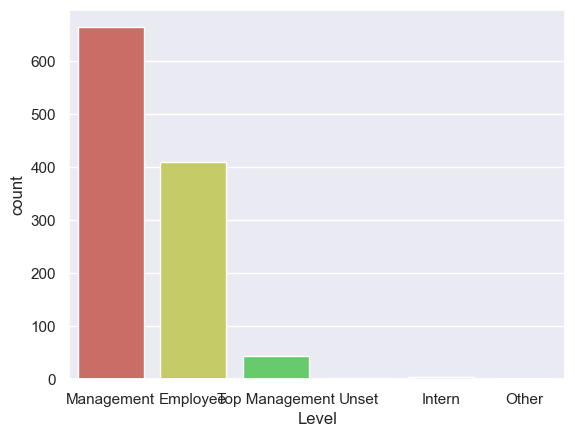

In [187]:
# zeige die Vertelung von Level
sns.countplot(x='Level', data=data_clean, palette='hls')

In [188]:
# Lössche unset und intern und other
data_clean = data_clean[data_clean['Level'] != 'Unset']
data_clean = data_clean[data_clean['Level'] != 'Intern']
data_clean = data_clean[data_clean['Level'] != 'Other']

In [189]:
# Lösche die Spalte Seniority
data_clean = data_clean.drop(['Seniority'], axis=1)

In [190]:
# zeige head von data_clean
data_clean.head()

,Age,Gender,Quit,YearsOverall,BasicSalary,Contract,CusSize,TechRole,ThisYearBonus,LastYearBonus,Level
0,28,Male,No,9.0,61200.0,Unlimited contract,1000+,1,1,1,Management
1,39,Female,No,13.0,108000.0,Unlimited contract,1000+,0,0,0,Management
3,32,Male,No,13.0,85000.0,Unlimited contract,1000+,1,1,1,Management
4,35,Female,No,5.0,75000.0,Unlimited contract,1000+,1,1,0,Management
5,22,Male,Yes,2.0,45000.0,Unlimited contract,1000+,1,1,1,Employee


## 2.3 Überprüfung auf Duplikate

In [191]:
# Index neu setzen
data_clean = data_clean.reset_index(drop=True)

# 2.4 Binäre Variablen in 1 und 0 umwandeln

In [192]:
# binäre variablen umwandeln
# Quit in 0 und 1 umwandeln
data_clean['Quit'] = data_clean['Quit'].map({'Yes': 1, 'No': 0})

In [193]:
# Gender in 0 und 1 umwandeln
data_clean['Gender'] = data_clean['Gender'].map({'Male': 1, 'Female': 0})

# 2.5 Ausreißer überprüfen wurden bereits bearbeitet

In [194]:
# Zeige alle Spalten mit kathegorischen Variablen
categorical_columns = data_clean.select_dtypes(include=['object']).columns
categorical_columns

Index(['Contract', 'CusSize', 'Level'], dtype='object')

In [195]:
# Zeige alle Spalten mit numerischen Variablen
numerical_columns = data_clean.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['Age', 'Gender', 'Quit', 'YearsOverall', 'BasicSalary', 'TechRole',
       'ThisYearBonus', 'LastYearBonus'],
      dtype='object')

In [196]:
# Liste der Spalten, die auf Ausreißer überprüft werden sollen
outlier_columns = numerical_columns

# Funktion zum Identifizieren von Ausreißern basierend auf dem IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Überprüfung auf Ausreißer für die angegebenen Spalten
for column in outlier_columns:
    outliers = detect_outliers(data_clean, column)
    print(f"Ausreißer in Spalte '{column}':")
    print(outliers)



Ausreißer in Spalte 'Age':
      Age  Gender  Quit  YearsOverall  BasicSalary            Contract  \
87     54       1     1          25.0      75000.0  Unlimited contract   
111    46       1     0          23.0      90000.0  Unlimited contract   
115    49       1     0          27.0      57000.0  Unlimited contract   
137    45       1     1           2.0      42000.0  Unlimited contract   
165    50       1     0          29.0      28800.0  Unlimited contract   
170    45       1     0          19.0      90000.0  Unlimited contract   
218    48       1     0          25.0      75000.0  Unlimited contract   
287    46       1     1           4.0      82000.0  Unlimited contract   
294    46       1     1          14.0      80000.0  Unlimited contract   
314    45       1     0          10.0      77000.0  Unlimited contract   
342    45       0     0           6.0      55000.0  Unlimited contract   
363    46       1     1          14.0      80000.0  Unlimited contract   
374    47  

/var/folders/9n/l51dmzlx70jgqg93_yzvb_y00000gn/T/ipykernel_7148/2608233413.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_clean.corr()


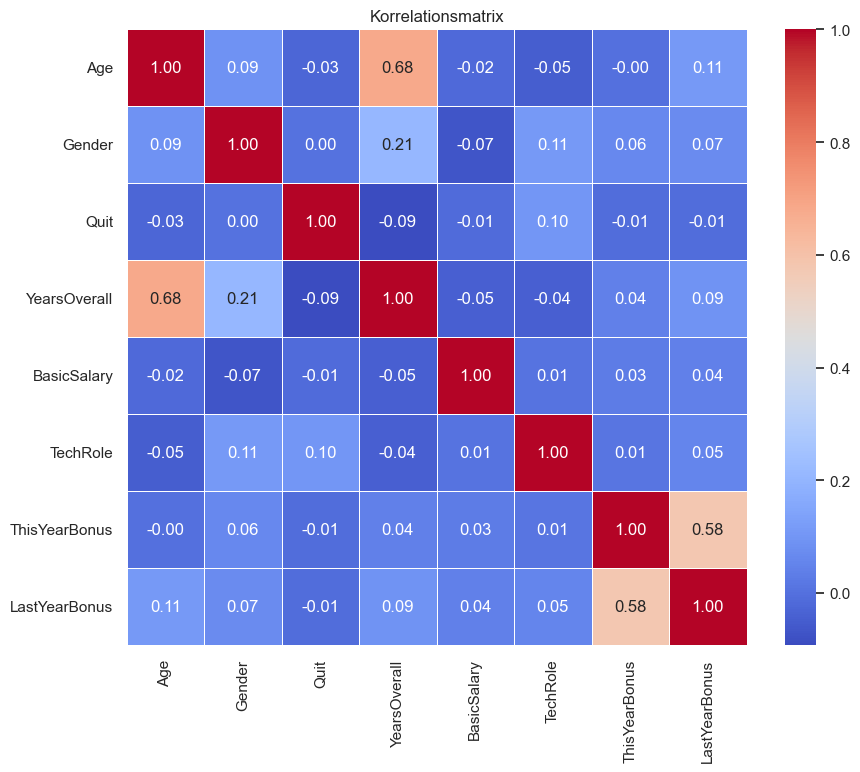

In [197]:
# Zeige eine Korrleationsmatrix für numerische Variablen
# Berechnen der Korrelationsmatrix
correlation_matrix = data_clean.corr()

# Erstellung der Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelationsmatrix')
plt.show()

### Export

In [198]:
# Exportiern des aktuellen Datensatzes
data_clean.to_csv('data_prepared.csv', index=False)